In [12]:
!pip install plotly

In [13]:
!pip install bar-chart-race

   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ------- -------------------------------- 30.7/156.8 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/156.8 kB 81.9 kB/s eta 0:00:02
   --------------- ----------------------- 61.4/156.8 kB 126.1 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/156

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Electric Vehicle.csv")

### Task -1 (EDA)

In [19]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [20]:
df.shape

(112634, 17)

In [21]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [23]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [26]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [27]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### Univariate Analysis

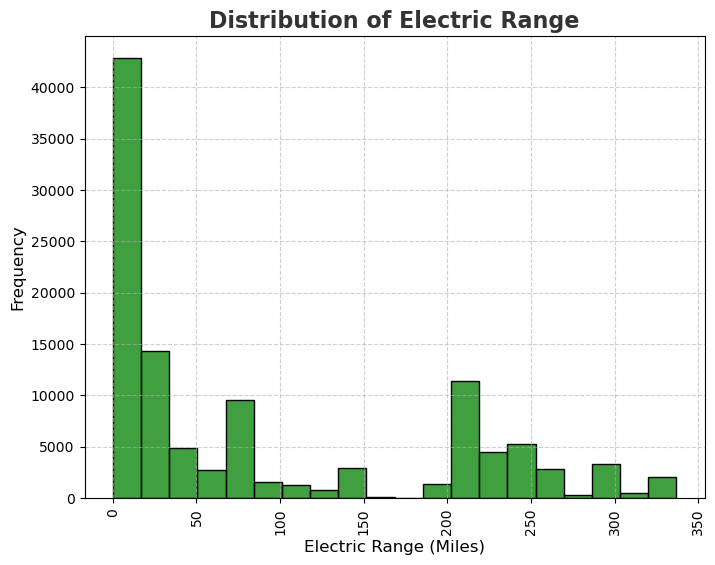

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Electric Range'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

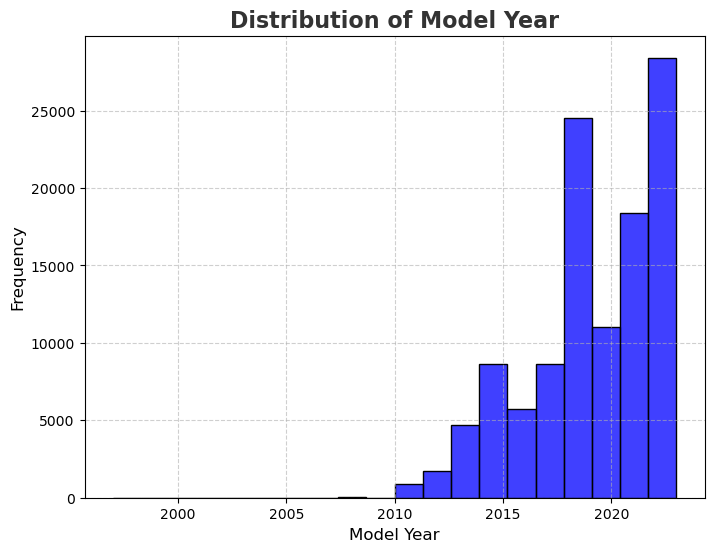

In [51]:
plt.figure(figsize=(8, 6)) 

sns.histplot(df['Model Year'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Model Year', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Model Year', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

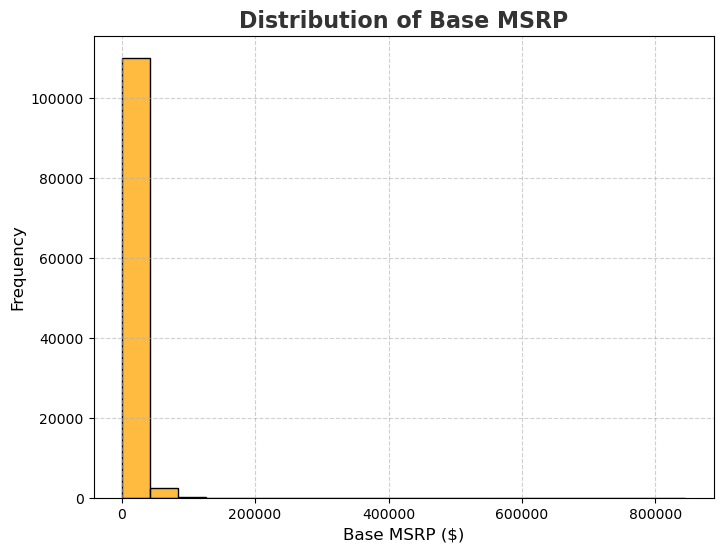

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Base MSRP'], bins=20, color='orange', edgecolor='black') 
plt.title('Distribution of Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

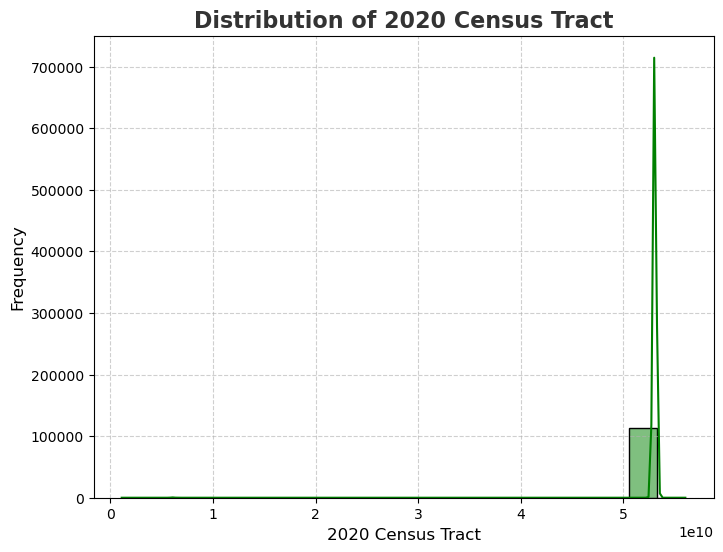

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['2020 Census Tract'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of 2020 Census Tract', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('2020 Census Tract', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Bivariate Analysis

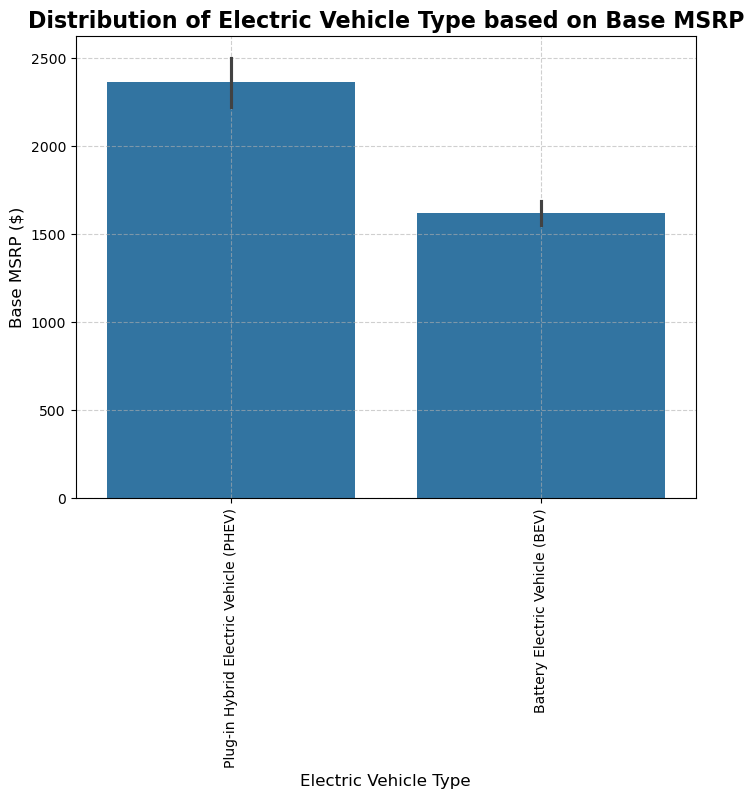

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title('Distribution of Electric Vehicle Type based on Base MSRP', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

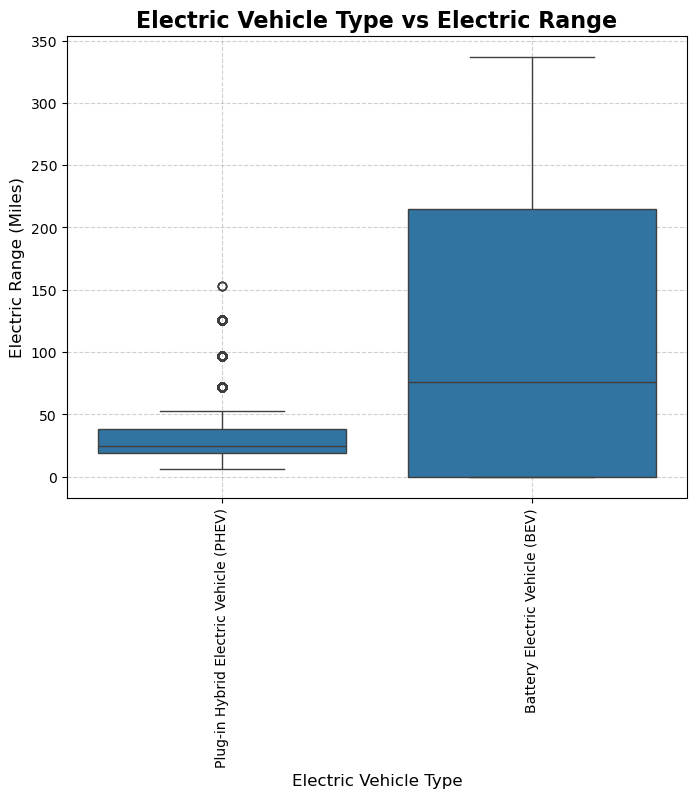

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Vehicle Type vs Electric Range', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

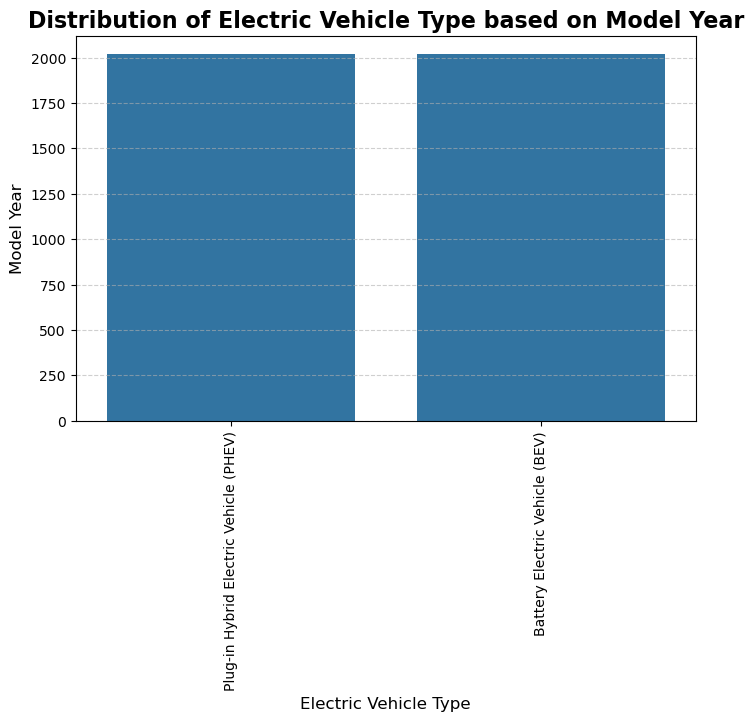

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Electric Vehicle Type', y='Model Year', data=df)
plt.title('Distribution of Electric Vehicle Type based on Model Year', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Model Year', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Task - 2 (Choropleth Plot)

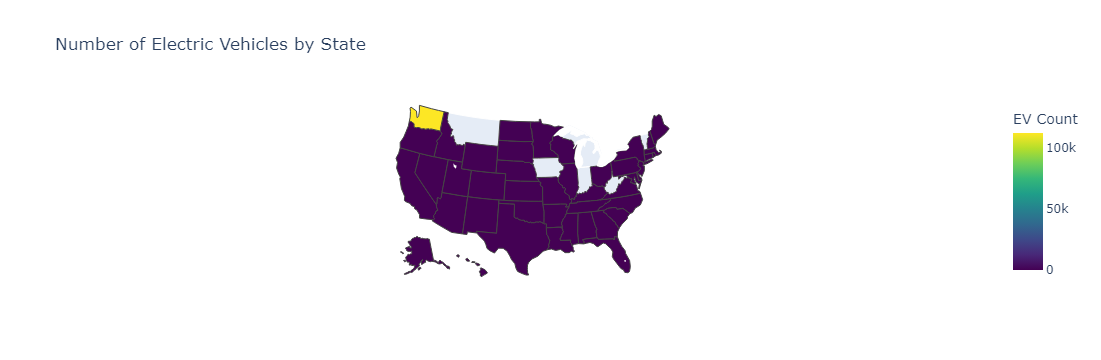

In [58]:

# Prepare data for the choropleth plot (aggregate by state)
state_ev_count = df.groupby('State').size().reset_index(name='EV Count')

# Create a choropleth plot using plotly express
fig = px.choropleth(
    state_ev_count,
    locations='State',
    locationmode="USA-states",
    color='EV Count',
    color_continuous_scale="Viridis",
    scope="usa",
    title='Number of Electric Vehicles by State'
)

# Show the plot
fig.show()

### Task - 3 (Racing bar plot)

In [59]:
import bar_chart_race as bcr

In [66]:
evcar_per_year = df.groupby(['Make', 'Model Year']).size().reset_index(name='number_of_Vehicles')

print(evcar_per_year)

      Make  Model Year  number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
204  VOLVO        2019                 190
205  VOLVO        2020                 162
206  VOLVO        2021                 580
207  VOLVO        2022                 882
208  VOLVO        2023                  21

[209 rows x 3 columns]


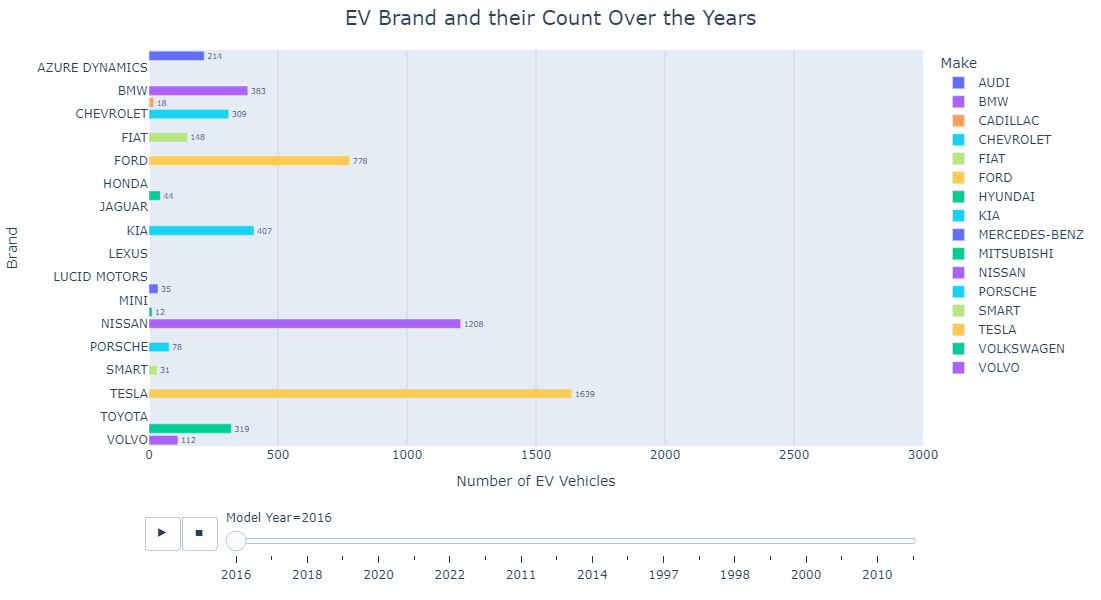

In [70]:
fig = px.bar(evcar_per_year,
             y='Make',  
             x='number_of_Vehicles',  
             color='Make',  
             animation_frame='Model Year',  
             orientation='h',  
             title='EV Brand and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

fig.update_traces(texttemplate='%{x}',  
                  textposition='outside',  
                  textfont_size=16)  

fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  
    yaxis_title='Brand',
    xaxis_title='Number of EV Vehicles',
    showlegend=True,  
    title_x=0.5,  
    title_font=dict(size=20),  
    margin=dict(l=50, r=50, t=50, b=50),  
    width=800,  
    height=600 
)

fig.show()